In [1]:
path =  '/mnt/data/zhujun/dataset/Youtube/'
from PIL import Image
import os
import numpy as np
import sys
sys.path.append('../../')

from benchmarking.video import YoutubeVideo
from benchmarking.utils.model_utils import eval_single_image
from benchmarking.utils.utils import interpolation, compute_f1


In [2]:
# load ground truth
dataset = 'driving2'
resol = '720p'
metadata_file = path + '/{}/metadata.json'.format(dataset)
dt_file = os.path.join(
    path, dataset, resol,
    'profile/updated_gt_FasterRCNN_COCO_no_filter.csv')
original_video = YoutubeVideo(dataset, resol, metadata_file, dt_file, None)
gt = original_video.get_video_detection()
dt_file = os.path.join(
    path, dataset, resol,
    'profile/updated_gt_mobilenet_COCO_no_filter.csv')
mobilenet_video = YoutubeVideo(dataset, resol, metadata_file, dt_file, None)
mobilenet_dt = mobilenet_video.get_video_detection()
dt_file = './' + dataset + '/data/updated_gt_mobilenetFinetuned_COCO_no_filter.csv'
new_mobilenet_video = YoutubeVideo(dataset, resol, metadata_file, dt_file, None)
new_mobilenet_dt = new_mobilenet_video.get_video_detection()


In [3]:
%matplotlib inline
img_path = path + dataset + '/720p/'

    
    

/mnt/data/zhujun/dataset/Youtube/driving2/720p/000001.jpg
/mnt/data/zhujun/dataset/Youtube/driving2/720p/000002.jpg
/mnt/data/zhujun/dataset/Youtube/driving2/720p/000003.jpg
/mnt/data/zhujun/dataset/Youtube/driving2/720p/000004.jpg
/mnt/data/zhujun/dataset/Youtube/driving2/720p/000005.jpg
/mnt/data/zhujun/dataset/Youtube/driving2/720p/000006.jpg
/mnt/data/zhujun/dataset/Youtube/driving2/720p/000007.jpg
/mnt/data/zhujun/dataset/Youtube/driving2/720p/000008.jpg
/mnt/data/zhujun/dataset/Youtube/driving2/720p/000009.jpg


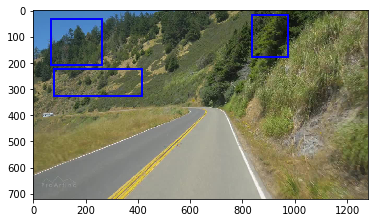

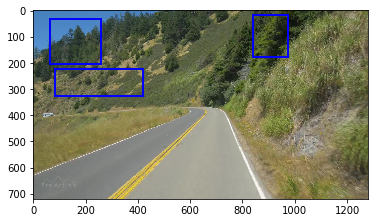

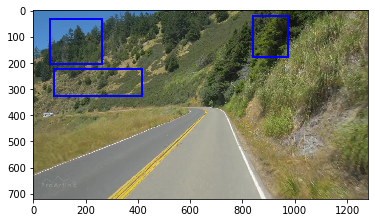

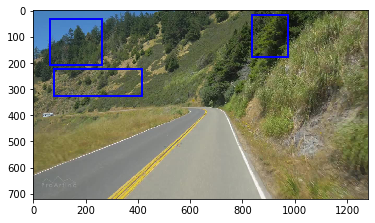

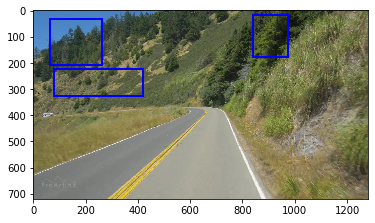

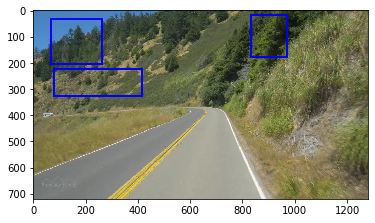

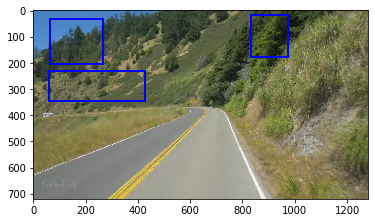

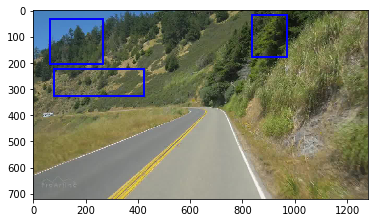

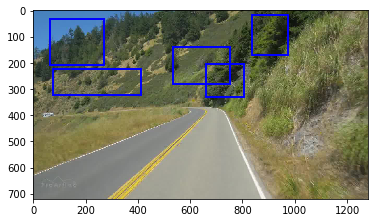

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
for i in range(1, 10):
    filename = os.path.join(img_path, format(i, '06d') + '.jpg')
    print(filename)
    im = np.array(Image.open(filename), dtype=np.uint8)
    fig,ax = plt.subplots(1)
    ax.imshow(im)
    # Create a Rectangle patch
    for box in gt[i]:
        x1 = box[0]
        y1 = box[1]
        x2 = box[2]
        y2 = box[3]
        t = box[4]
        score = box[5]
        rect = Rectangle((x1,y1),x2-x1, y2-y1,linewidth=2,edgecolor='g',facecolor='none')
        

        # Add the patch to the Axes
        ax.add_patch(rect)
    for box in mobilenet_dt[i]:
        x1 = box[0]
        y1 = box[1]
        x2 = box[2]
        y2 = box[3]
        t = box[4]
        score = box[5]
        if score < 0.9:
            continue
        rect = Rectangle((x1,y1),x2-x1, y2-y1,linewidth=2,edgecolor='r',facecolor='none')
        

        # Add the patch to the Axes
        ax.add_patch(rect)        

    for box in new_mobilenet_dt[i]:
        x1 = box[0]
        y1 = box[1]
        x2 = box[2]
        y2 = box[3]
        t = box[4]
        score = box[5]
        if score < 0.3:
            continue
        rect = Rectangle((x1,y1),x2-x1, y2-y1,linewidth=2,edgecolor='b',facecolor='none')
        

        # Add the patch to the Axes
        ax.add_patch(rect) 